## Common Causes of Death Analysis 
#Justin, Thomas, Karuna, Joseph, Harleen and Grant!

In [1]:
#import dependencies 
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import hvplot.pandas
import geoviews as gv
import geoviews.tile_sources as gvts
import geopandas as gpd


C:\Users\thomas\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
#paths to csv data
Cause_df = 'Resources/cause_of_deaths.csv'
Aid_df = 'Resources/us_foreign_aid_country.csv'
pop_data_path="Resources/popdata.csv"

#reading csv data and creating dataframes out of it
Cause_df = pd.read_csv(Cause_df)
Aid_df = pd.read_csv(Aid_df)
pop_data_df=pd.read_csv(pop_data_path)
#changing year from int to str for merging
Cause_df['Year'] = Cause_df['Year'].astype(str)
pop_data_df['Year'] =pop_data_df['Year'].astype(str)
#rename columns for merge 
Aid_df = Aid_df.rename(columns = {'Country Code' : 'Code',
                                 'Fiscal Year' : 'Year',
                                 'Country Name' : 'Country/Territory',
                                 'current_amount':'Current Amount of Aid Given by US ($USD)',
                                  'constant_amount':'Constant Amount of Aid Given by US ($USD)',
                                 'Income Group Name':'Country Income Category'})

#obligation only transactoin type
Aid_df=Aid_df.loc[(Aid_df['Transaction Type Name']== 'Obligations')]

#Filtering aid_df
Aid_df=Aid_df[['Year','Country/Territory','Code','Country Income Category','Current Amount of Aid Given by US ($USD)','Constant Amount of Aid Given by US ($USD)']]


#merging
cause_pop_df=Cause_df.merge(pop_data_df,on=['Code','Year'])
Cause_aid_df = Cause_df.merge(Aid_df, on = ['Code', 'Year', 'Country/Territory'])

Cause_aid_df.head()
cause_aid_pop_df=Cause_aid_df.merge(pop_data_df,on=['Code','Year'])

cause_pop_df.to_csv('Resources/cause_pop.csv')
cause_aid_pop_df.to_csv('Resources/cause_aid_pop.csv')
cause_aid_pop_df


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Country Income Category,Current Amount of Aid Given by US ($USD),Constant Amount of Aid Given by US ($USD),Population
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,4154,5945,2673,5005,323,2985,Low Income Country,15222050,30254306,10694796
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,4472,6050,2728,5120,332,3092,Low Income Country,20140068,38650393,10745167
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,5106,6223,2830,5335,360,3325,Low Income Country,31593344,59151797,12057433
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,5681,6445,2943,5568,396,3601,Low Income Country,38124000,69740780,14003760
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,6001,6664,3027,5739,420,3816,Low Income Country,2462000,4407728,15455555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2373,2751,1956,4202,632,146,Lower Middle Income Country,188417887,225997382,14154937
4580,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2436,2788,1962,4264,648,146,Lower Middle Income Country,261441831,311008606,14452704
4581,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2473,2818,2007,4342,654,144,Lower Middle Income Country,215989615,252432224,14751101
4582,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2509,2849,2030,4377,657,139,Lower Middle Income Country,228948728,261439183,15052184


In [3]:
cause_aid_pop_df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis',
       'Country Income Category', 'Current Amount of Aid Given by US ($USD)',
       'Constant Amount of Aid Given by US ($USD)',

In [4]:
#looking for most and least deadly from 1990-2019
top_deaths_df=cause_aid_pop_df[['Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis']].sum()

top_deaths_df=top_deaths_df.sort_values(ascending=False)
top_deaths_df.head()
top_deaths=top_deaths_df[:5]
display(top_deaths)
top_deaths.index

Cardiovascular Diseases         305598624
Neoplasms                       142008849
Neonatal Disorders               68820123
Lower Respiratory Infections     68227438
Diarrheal Diseases               62439459
dtype: int64

Index(['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders',
       'Lower Respiratory Infections', 'Diarrheal Diseases'],
      dtype='object')

Text(0.5, 1.0, 'Top 5 Deaths Worldwide 1990-2019')

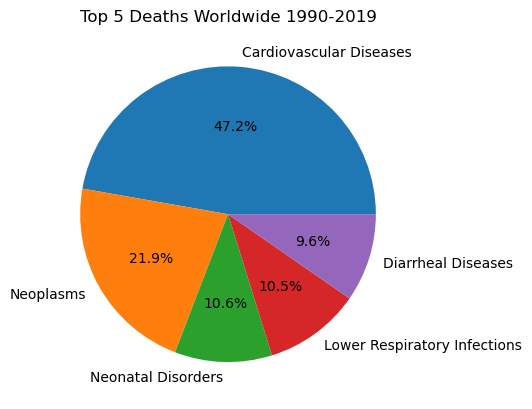

In [5]:
top_deaths.plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Deaths Worldwide 1990-2019')

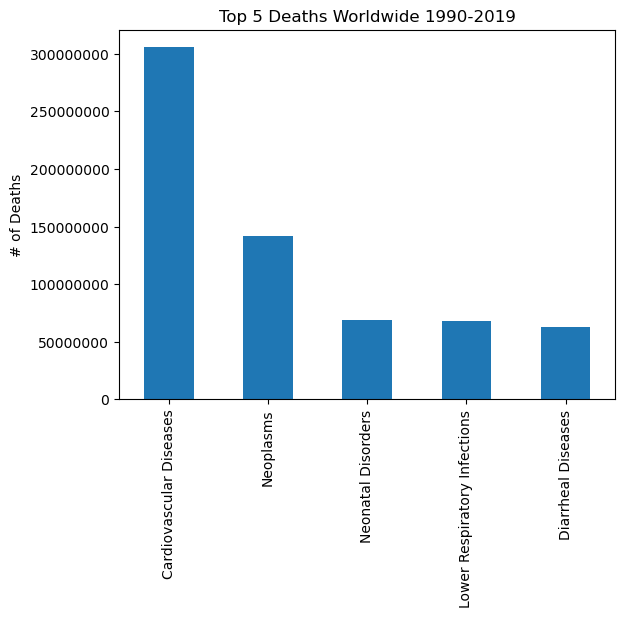

In [6]:
top_deaths.plot.bar()
plt.ylabel('# of Deaths')
plt.title('Top 5 Deaths Worldwide 1990-2019')
#https://www.reddit.com/r/learnpython/comments/el4vbx/how_to_remove_scientific_notation_from_a/
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [7]:
#least deadly causes of death 1990-2019
least_deaths_df=top_deaths_df.sort_values()
least_deaths_df.head()
least_deaths=least_deaths_df[:5]
display(least_deaths)
least_deaths.index


Exposure to Forces of Nature            1144268
Environmental Heat and Cold Exposure    1502732
Poisonings                              1649724
Drug Use Disorders                      1846550
Conflict and Terrorism                  2645144
dtype: int64

Index(['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure',
       'Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism'],
      dtype='object')

Text(0.5, 1.0, 'Bottom 5 Deaths Worldwide 1990-2019')

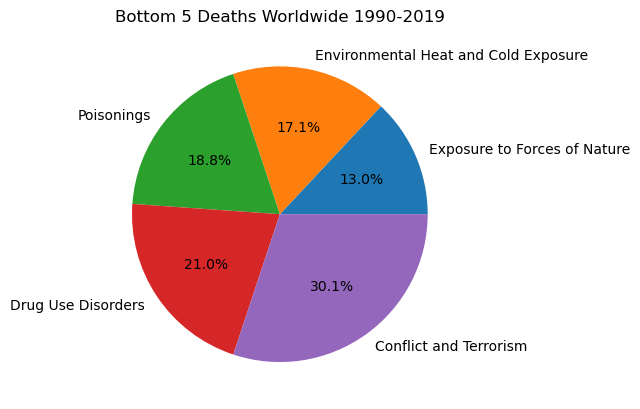

In [8]:
least_deaths.plot.pie(autopct='%1.1f%%')
plt.title('Bottom 5 Deaths Worldwide 1990-2019')

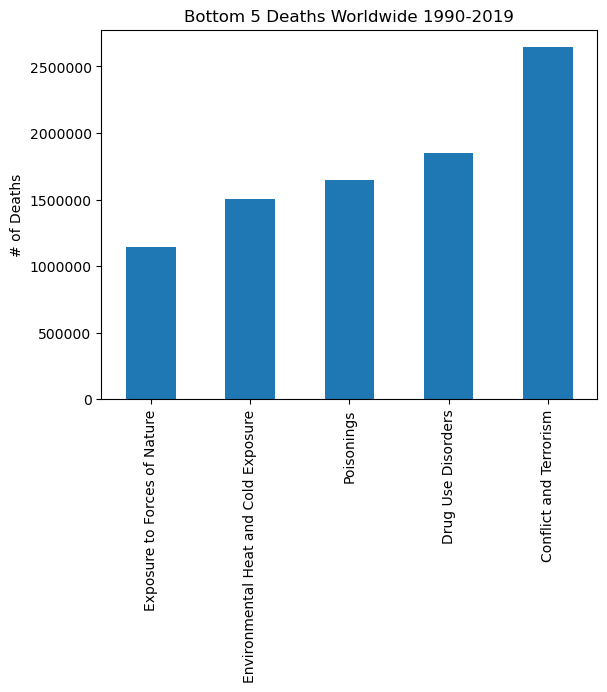

In [9]:
least_deaths.plot.bar()
plt.ylabel('# of Deaths')
plt.title('Bottom 5 Deaths Worldwide 1990-2019')
#https://www.reddit.com/r/learnpython/comments/el4vbx/how_to_remove_scientific_notation_from_a/
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [10]:
#top deaths per country
top_death_country=cause_aid_pop_df.groupby(['Code'])[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders',
       'Lower Respiratory Infections', 'Diarrheal Diseases']].sum()
display(top_death_country)

,Cardiovascular Diseases,Neoplasms,Neonatal Disorders,Lower Respiratory Infections,Diarrheal Diseases
Code,,,,,
AFG,1607042,469611,697534,822179,245832
AGO,525047,237225,554921,564508,810148
ALB,263902,99961,14696,24262,601
ARE,84302,50790,2580,6941,697
ARG,2836128,2113666,173947,697414,23155
...,...,...,...,...,...
VUT,15374,3900,2163,2585,1744
YEM,1110837,234015,729558,259044,419051
ZAF,2234693,1360234,674828,983661,600313


In [11]:
#top deaths per country by year
top_death_country_year=cause_aid_pop_df.groupby(['Code','Year'])[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders',
       'Lower Respiratory Infections', 'Diarrheal Diseases']].sum()
top_death_country_year

Cardiovascular Diseases  Neoplasms  Neonatal Disorders  \
Code Year                                                           
AFG  1990                    44899      11580               15612   
     1991                    45492      11796               17128   
     1992                    46557      12218               20060   
     1993                    47951      12634               22335   
     1994                    49308      12914               23288   
...                            ...        ...                 ...   
ZWE  2015                    16649      11161                9278   
     2016                    16937      11465                9065   
     2017                    17187      11744                8901   
     2018                    17460      12038                8697   
     2019                    17810      12353                8609   

           Lower Respiratory Infections  Diarrheal Diseases  
Code Year                                                    
AFG  1990                         23741                4235  
     1991                         24504                4927  
     1992                         27404                6123  
     1993                         31116                8174  
     1994                         33390                8215  
...                                 ...                 ...  
ZWE  2015                         12974                5102  
     2016                         13024                5002  
     2017                         12961                4948  
     2018                         12860                4745  
     2019                         12897                4635  

[4584 rows x 5 columns]

In [12]:
#bottom deaths per country 
bottom_death_country=cause_aid_pop_df.groupby(['Code'])[['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure',
       'Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']].sum()
display(bottom_death_country)

,Exposure to Forces of Nature,Environmental Heat and Cold Exposure,Poisonings,Drug Use Disorders,Conflict and Terrorism
Code,,,,,
AFG,16770,2187,14530,7094,280520
AGO,742,3520,14022,1190,54203
ALB,89,159,487,629,2145
ARE,0,159,535,9009,2
ARG,425,1567,8654,1535,773
...,...,...,...,...,...
VUT,175,27,54,27,0
YEM,1131,1049,12561,3718,95610
ZAF,877,15128,20736,7414,3788


In [13]:
#bottom deaths per country by year
bottom_death_country_year=cause_aid_pop_df.groupby(['Code','Year'])[['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure',
       'Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']].sum()
bottom_death_country_year

Exposure to Forces of Nature  Environmental Heat and Cold Exposure  \
Code Year                                                                       
AFG  1990                             0                                   175   
     1991                          1347                                   113   
     1992                           614                                    38   
     1993                           225                                    41   
     1994                           160                                    44   
...                                 ...                                   ...   
ZWE  2015                            16                                    37   
     2016                            31                                    37   
     2017                           251                                    37   
     2018                             0                                    37   
     2019                           660                                    37   

           Poisonings  Drug Use Disorders  Conflict and Terrorism  
Code Year                                                          
AFG  1990         338                  93                    1490  
     1991         351                 102                    3370  
     1992         386                 118                    4344  
     1993         425                 132                    4096  
     1994         451                 142                    8959  
...               ...                 ...                     ...  
ZWE  2015         381                 104                      13  
     2016         393                 110                       6  
     2017         398                 115                       5  
     2018         400                 121                       9  
     2019         405                 127                      11  

[4584 rows x 5 columns]

In [14]:
#making a df for deaths per capita 
per_capita_death_df=cause_pop_df[['Code','Year','Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis','Population']].set_index("Code")

#need to itterate over the columns and divide each death column by the population i would assume its some sort of for loop
# per_capita_death_df['Meningitis Death per Capita']=per_capita_death_df['Meningitis']/per_capita_death_df['Population']
display(per_capita_death_df)


,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Population
Code,,,,,,,,,,,,,,,,,,,,,
AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,...,3709,338,2054,4154,5945,2673,5005,323,2985,10694796
AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,...,3724,351,2119,4472,6050,2728,5120,332,3092,10745167
AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,...,3776,386,2404,5106,6223,2830,5335,360,3325,12057433
AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,...,3862,425,2797,5681,6445,2943,5568,396,3601,14003760
AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,...,3932,451,3038,6001,6664,3027,5739,420,3816,15455555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,2015,1439,754,215,3019,2518,770,1302,1355,29162,...,2108,381,2990,2373,2751,1956,4202,632,146,14154937
ZWE,2016,1457,767,219,3056,2050,801,1342,1338,27141,...,2160,393,3027,2436,2788,1962,4264,648,146,14452704
ZWE,2017,1460,781,223,2990,2116,818,1363,1312,24846,...,2196,398,2962,2473,2818,2007,4342,654,144,14751101


In [15]:
#for a per captia population by aid correlation. 

percapita_aid_pop_df=cause_aid_pop_df[['Code','Population','Current Amount of Aid Given by US ($USD)']].set_index("Code")

#need to itterate over the columns and divide each death column by the population i would assume its some sort of for loop
# per_capita_death_df['Meningitis Death per Capita']=per_capita_death_df['Meningitis']/per_capita_death_df['Population']
#display(per_capita_death_df)

#adding columns for death per capita for each cause of death and the data in those new columns
clm_list=percapita_aid_pop_df.columns.values
for column in clm_list[1:(len(clm_list)-1)]:
    percapita_aid_pop_df[f'{column} Current Amount of Aid Given by US ($USD)']=percapita_aid_pop_df[column]/percapita_aid_pop_df['Population']*100

percapita_aid_pop_df.columns


Index(['Population', 'Current Amount of Aid Given by US ($USD)'], dtype='object')

In [16]:
#adding columns for death per capita for each cause of death and the data in those new columns
column_list=per_capita_death_df.columns.values
for column in column_list[1:(len(column_list)-1)]:
    per_capita_death_df[f'{column} Death per Capita']=per_capita_death_df[column]/per_capita_death_df['Population']*100



In [17]:
per_capita_death_df.columns

Index(['Year', 'Meningitis', 'Alzheimer's Disease and Other Dementias',
       'Parkinson's Disease', 'Nutritional Deficiencies', 'Malaria',
       'Drowning', 'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'Population',
       'Meningitis Death per Capita',
       'Alzheimer's Disease and Other Dementias Death per Capita',
       'Parkinson's Disease Death per Capita',

In [18]:
#create a new df with just death per capita stats
death_per_capita_list=['Year','Meningitis Death per Capita',
       "Alzheimer's Disease and Other Dementias Death per Capita",
       "Parkinson's Disease Death per Capita",
       'Nutritional Deficiencies Death per Capita', 'Malaria Death per Capita',
       'Drowning Death per Capita', 'Interpersonal Violence Death per Capita',
       'Maternal Disorders Death per Capita', 'HIV/AIDS Death per Capita',
       'Drug Use Disorders Death per Capita', 'Tuberculosis Death per Capita',
       'Cardiovascular Diseases Death per Capita',
       'Lower Respiratory Infections Death per Capita',
       'Neonatal Disorders Death per Capita',
       'Alcohol Use Disorders Death per Capita', 'Self-harm Death per Capita',
       'Exposure to Forces of Nature Death per Capita',
       'Diarrheal Diseases Death per Capita',
       'Environmental Heat and Cold Exposure Death per Capita',
       'Neoplasms Death per Capita', 'Conflict and Terrorism Death per Capita',
       'Diabetes Mellitus Death per Capita',
       'Chronic Kidney Disease Death per Capita',
       'Poisonings Death per Capita',
       'Protein-Energy Malnutrition Death per Capita',
       'Road Injuries Death per Capita',
       'Chronic Respiratory Diseases Death per Capita',
       'Cirrhosis and Other Chronic Liver Diseases Death per Capita',
       'Digestive Diseases Death per Capita',
       'Fire, Heat, and Hot Substances Death per Capita',
       'Acute Hepatitis Death per Capita','Population']
death_per_capita_df=per_capita_death_df[death_per_capita_list]
death_per_capita_df


,Year,Meningitis Death per Capita,Alzheimer's Disease and Other Dementias Death per Capita,Parkinson's Disease Death per Capita,Nutritional Deficiencies Death per Capita,Malaria Death per Capita,Drowning Death per Capita,Interpersonal Violence Death per Capita,Maternal Disorders Death per Capita,HIV/AIDS Death per Capita,...,Chronic Kidney Disease Death per Capita,Poisonings Death per Capita,Protein-Energy Malnutrition Death per Capita,Road Injuries Death per Capita,Chronic Respiratory Diseases Death per Capita,Cirrhosis and Other Chronic Liver Diseases Death per Capita,Digestive Diseases Death per Capita,"Fire, Heat, and Hot Substances Death per Capita",Acute Hepatitis Death per Capita,Population
Code,,,,,,,,,,,,,,,,,,,,,
AFG,1990,0.020187,0.010435,0.003469,0.019514,0.000870,0.012810,0.014381,0.024825,0.000318,...,0.034680,0.003160,0.019206,0.038841,0.055588,0.024993,0.046798,0.003020,0.027911,10694796
AFG,1991,0.020642,0.010572,0.003481,0.020037,0.001759,0.012945,0.018622,0.026849,0.000382,...,0.034657,0.003267,0.019720,0.041619,0.056304,0.025388,0.047649,0.003090,0.028776,10745167
AFG,1992,0.020527,0.009637,0.003135,0.020245,0.001982,0.012557,0.019067,0.027493,0.000398,...,0.031317,0.003201,0.019938,0.042347,0.051611,0.023471,0.044247,0.002986,0.027576,12057433
AFG,1993,0.020080,0.008476,0.002742,0.020259,0.000771,0.012047,0.018488,0.026214,0.000400,...,0.027578,0.003035,0.019973,0.040568,0.046023,0.021016,0.039761,0.002828,0.025715,14003760
AFG,1994,0.019585,0.007835,0.002530,0.019935,0.001365,0.011705,0.018434,0.024994,0.000408,...,0.025441,0.002918,0.019656,0.038827,0.043117,0.019585,0.037132,0.002717,0.024690,15455555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,2015,0.010166,0.005327,0.001519,0.021328,0.017789,0.005440,0.009198,0.009573,0.206020,...,0.014892,0.002692,0.021123,0.016764,0.019435,0.013819,0.029686,0.004465,0.001031,14154937
ZWE,2016,0.010081,0.005307,0.001515,0.021145,0.014184,0.005542,0.009285,0.009258,0.187792,...,0.014945,0.002719,0.020944,0.016855,0.019291,0.013575,0.029503,0.004484,0.001010,14452704
ZWE,2017,0.009898,0.005295,0.001512,0.020270,0.014345,0.005545,0.009240,0.008894,0.168435,...,0.014887,0.002698,0.020080,0.016765,0.019104,0.013606,0.029435,0.004434,0.000976,14751101


In [19]:
#function to find top deaths of slected country
top_deaths=['Year','Cardiovascular Diseases Death per Capita', 'Neoplasms Death per Capita', 'Neonatal Disorders Death per Capita',
       'Lower Respiratory Infections Death per Capita', 'Diarrheal Diseases Death per Capita']
def top_death_of_country (code):
    top=death_per_capita_df.loc[(death_per_capita_df.index.values==code)]
    return top[top_deaths]

In [20]:
#function to find bottom deaths of slected country
bottom_deaths=['Year','Exposure to Forces of Nature Death per Capita', 'Environmental Heat and Cold Exposure Death per Capita',
       'Poisonings Death per Capita', 'Drug Use Disorders Death per Capita', 'Conflict and Terrorism Death per Capita']
def bottom_death_of_country (code):
    bottom =death_per_capita_df.loc[(death_per_capita_df.index.values==code)]
    return bottom[bottom_deaths]

In [21]:
afg_death=death_per_capita_df.loc[(death_per_capita_df.index.values=='AFG')]
afg_death.head()

,Year,Meningitis Death per Capita,Alzheimer's Disease and Other Dementias Death per Capita,Parkinson's Disease Death per Capita,Nutritional Deficiencies Death per Capita,Malaria Death per Capita,Drowning Death per Capita,Interpersonal Violence Death per Capita,Maternal Disorders Death per Capita,HIV/AIDS Death per Capita,...,Chronic Kidney Disease Death per Capita,Poisonings Death per Capita,Protein-Energy Malnutrition Death per Capita,Road Injuries Death per Capita,Chronic Respiratory Diseases Death per Capita,Cirrhosis and Other Chronic Liver Diseases Death per Capita,Digestive Diseases Death per Capita,"Fire, Heat, and Hot Substances Death per Capita",Acute Hepatitis Death per Capita,Population
Code,,,,,,,,,,,,,,,,,,,,,
AFG,1990,0.020187,0.010435,0.003469,0.019514,0.000870,0.012810,0.014381,0.024825,0.000318,...,0.034680,0.003160,0.019206,0.038841,0.055588,0.024993,0.046798,0.003020,0.027911,10694796
AFG,1991,0.020642,0.010572,0.003481,0.020037,0.001759,0.012945,0.018622,0.026849,0.000382,...,0.034657,0.003267,0.019720,0.041619,0.056304,0.025388,0.047649,0.003090,0.028776,10745167
AFG,1992,0.020527,0.009637,0.003135,0.020245,0.001982,0.012557,0.019067,0.027493,0.000398,...,0.031317,0.003201,0.019938,0.042347,0.051611,0.023471,0.044247,0.002986,0.027576,12057433
AFG,1993,0.020080,0.008476,0.002742,0.020259,0.000771,0.012047,0.018488,0.026214,0.000400,...,0.027578,0.003035,0.019973,0.040568,0.046023,0.021016,0.039761,0.002828,0.025715,14003760
AFG,1994,0.019585,0.007835,0.002530,0.019935,0.001365,0.011705,0.018434,0.024994,0.000408,...,0.025441,0.002918,0.019656,0.038827,0.043117,0.019585,0.037132,0.002717,0.024690,15455555


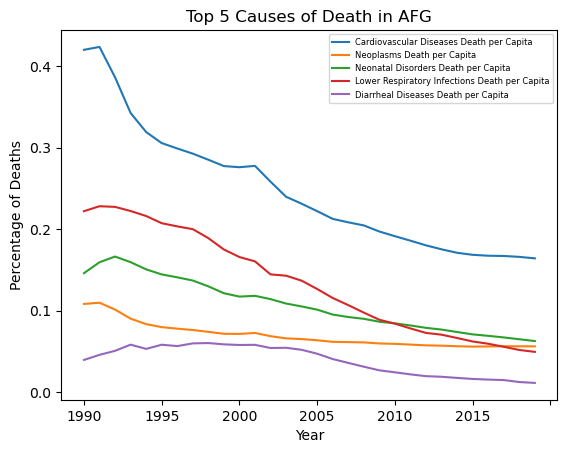

In [22]:
#plot of the top 5 causes of death from 1990-2019 looking at it per capita this time in AFG
afg_death_top=top_death_of_country('AFG')
afg_death_top.plot(x='Year',title='Top 5 Causes of Death in AFG').legend(fontsize=6, loc="best")
plt.ylabel('Percentage of Deaths')
plt.show()

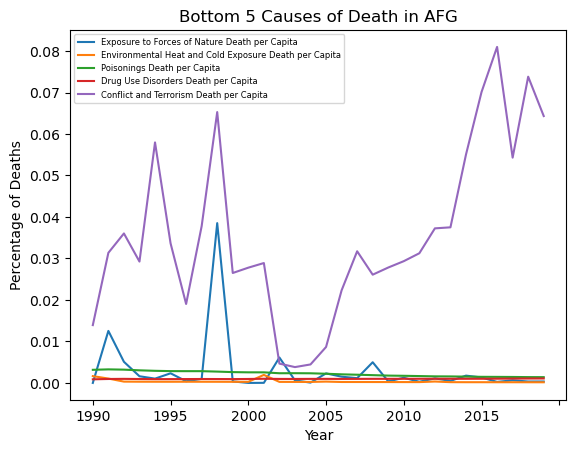

In [23]:
#plot of the bottom 5 causes of death from 1990-2019 looking at it per capita this time in AFG

afg_death_bottom=bottom_death_of_country('AFG')



afg_death_bottom.plot(x='Year',title='Bottom 5 Causes of Death in AFG').legend(fontsize=6, loc="best")
plt.ylabel('Percentage of Deaths')
plt.show()
                  


                           
                           

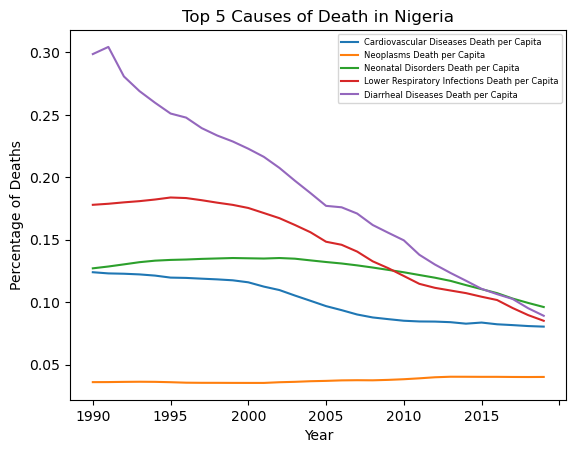

In [24]:
nigeria_death_top = top_death_of_country('NGA')

nigeria_death_top=nigeria_death_top.sort_values('Year')
nigeria_death_top.plot(x='Year',title='Top 5 Causes of Death in Nigeria').legend(fontsize=6, loc="best")
plt.ylabel('Percentage of Deaths')
plt.show()

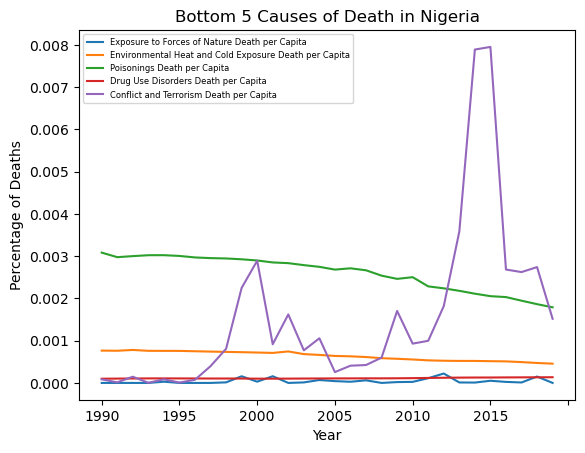

In [25]:
nigeria_death_bottom = bottom_death_of_country('NGA')
nigeria_death_bottom=nigeria_death_bottom.sort_values('Year')
nigeria_death_bottom.plot(x='Year',title='Bottom 5 Causes of Death in Nigeria').legend(fontsize=6, loc="best")
plt.ylabel('Percentage of Deaths')
plt.show()

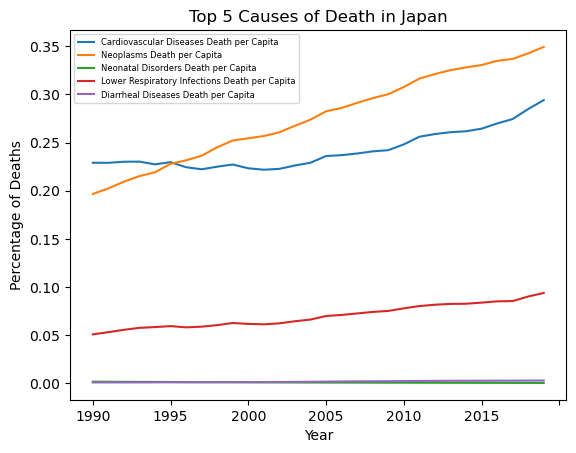

In [26]:
japan_death_top = top_death_of_country('JPN')
japan_death_top=japan_death_top.sort_values('Year')
japan_death_top.plot(x='Year',title='Top 5 Causes of Death in Japan').legend(fontsize=6, loc="best")
plt.ylabel('Percentage of Deaths')
plt.show()

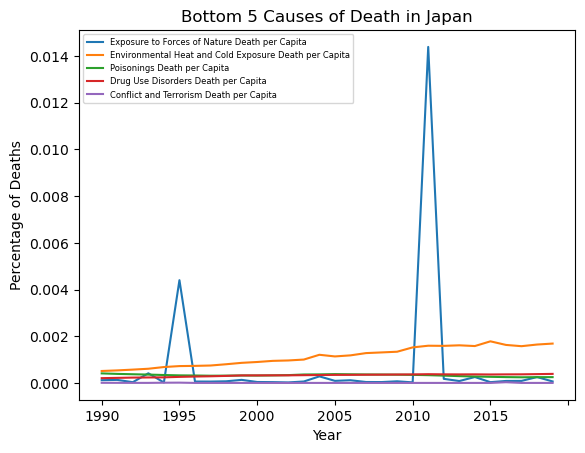

In [27]:
japan_death_bottom = bottom_death_of_country('JPN')
japan_death_bottom=japan_death_bottom.sort_values('Year')
japan_death_bottom.plot(x='Year',title='Bottom 5 Causes of Death in Japan').legend(fontsize=6, loc="best")
plt.ylabel('Percentage of Deaths')
plt.show()

In [28]:
popbyaid_df = cause_aid_pop_df.loc[cause_aid_pop_df['Code'] != 'USA']
popbyaid_df = popbyaid_df[['Code','Population', 'Current Amount of Aid Given by US ($USD)']]
popbyaid_df

,Code,Population,Current Amount of Aid Given by US ($USD)
0,AFG,10694796,15222050
1,AFG,10745167,20140068
2,AFG,12057433,31593344
3,AFG,14003760,38124000
4,AFG,15455555,2462000
...,...,...,...
4579,ZWE,14154937,188417887
4580,ZWE,14452704,261441831
4581,ZWE,14751101,215989615
4582,ZWE,15052184,228948728


The correlation between current Aid and population internationally is 0.05


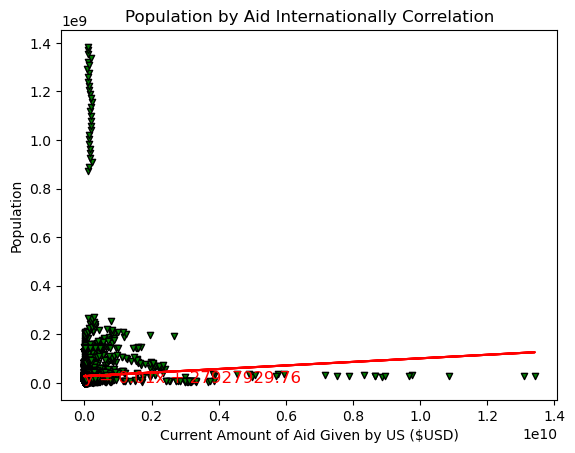

In [29]:
#make Population by Aid correlation internationally 

#afg_top_5_cor = popbyaid_df[['Year', 'Neoplasms Death per Capita', 'Diarrheal Diseases Death per Capita']]
results_list=st.linregress(popbyaid_df['Current Amount of Aid Given by US ($USD)'],popbyaid_df['Population'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=popbyaid_df['Current Amount of Aid Given by US ($USD)']
y_pred=slope*np.array(x)+intercept
popbyaid_df.plot.scatter(['Current Amount of Aid Given by US ($USD)'],['Population'],xlabel='Current Amount of Aid Given by US ($USD)',ylabel='Population' ,title= 'Population by Aid Internationally Correlation',marker="v", c="green", edgecolors="black", alpha=1.0)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y_pred, color = 'red')
plt.annotate(line_eq, (.09, .02), fontsize=12,color="red")


model = st.linregress(popbyaid_df["Current Amount of Aid Given by US ($USD)"],popbyaid_df["Population"])
y_values = popbyaid_df["Current Amount of Aid Given by US ($USD)"]*model[0] + model[1]
plt.plot(x, y_values,color='red')

correlation= st.pearsonr(popbyaid_df["Current Amount of Aid Given by US ($USD)"], popbyaid_df["Population"])
print(f"The correlation between current Aid and population internationally is {round(correlation[0],2)}")

# print(x)
#plt.title('Neoplam and Diarrheal Deaths in Afghanistan Correlation')


In [30]:
# incomebyaid_df['Country Income Category'].value_counts()

In [31]:
countrycat = ['Low Income Country', 'Lower Middle Income Country', 'Upper Middle Income Country', 'High Income Country', np.nan]

print(pd.get_dummies(countrycat, dummy_na=True))

   High Income Country  Low Income Country  Lower Middle Income Country  \
0                False                True                        False   
1                False               False                         True   
2                False               False                        False   
3                 True               False                        False   
4                False               False                        False   

   Upper Middle Income Country    NaN  
0                        False  False  
1                        False  False  
2                         True  False  
3                        False  False  
4                        False   True  


Text(0.5, 1.0, 'Current Amount of US Aid by Foregin Country Income Category')

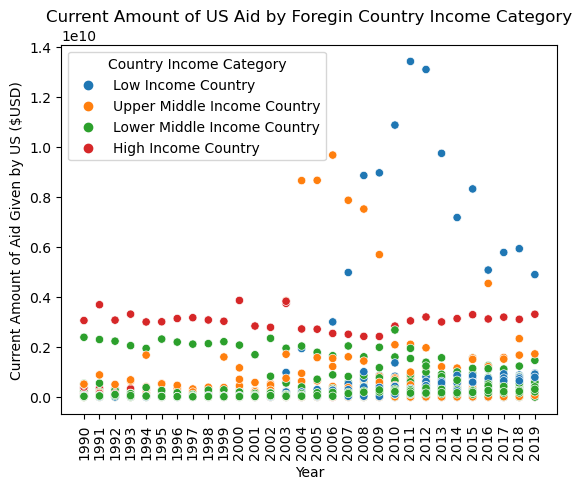

In [32]:
incomebyaid_df = cause_aid_pop_df.loc[cause_aid_pop_df['Code'] != 'USA']
incomebyaid_df = incomebyaid_df[['Year','Code', 'Country Income Category', 'Current Amount of Aid Given by US ($USD)']]
incomebyaid_df


plot = sns.scatterplot(data=incomebyaid_df, x='Year', y='Current Amount of Aid Given by US ($USD)', hue='Country Income Category')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Current Amount of US Aid by Foregin Country Income Category')
#incomebyaid_df.plot.bar('Country Income Category', 'Current Amount of Aid Given by US ($USD)')


The correlation between Neoplasm and Diarrheal Deaths in Afghanistan is 0.6


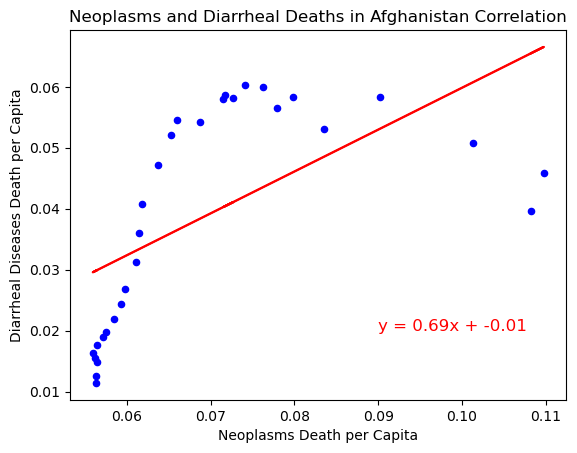

In [33]:
afg_top_5_cor = afg_death_top[['Year', 'Neoplasms Death per Capita', 'Diarrheal Diseases Death per Capita']]
results_list=st.linregress(afg_top_5_cor['Neoplasms Death per Capita'],afg_top_5_cor['Diarrheal Diseases Death per Capita'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=afg_top_5_cor['Neoplasms Death per Capita']
y_pred=slope*np.array(x)+intercept
afg_top_5_cor.plot.scatter(['Neoplasms Death per Capita'],['Diarrheal Diseases Death per Capita'],xlabel='Neoplasms Death per Capita',ylabel='Diarrheal Diseases Death per Capita' ,title= 'Neoplasms and Diarrheal Deaths in Afghanistan Correlation' ,color='blue')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y_pred, color = 'red')
plt.annotate(line_eq, (.09, .02), fontsize=12,color="red")


model = st.linregress(afg_top_5_cor["Neoplasms Death per Capita"],afg_top_5_cor["Diarrheal Diseases Death per Capita"])
y_values = afg_top_5_cor["Neoplasms Death per Capita"]*model[0] + model[1]
plt.plot(x, y_values,color='red')

correlation1= st.pearsonr(afg_top_5_cor["Neoplasms Death per Capita"], afg_top_5_cor["Diarrheal Diseases Death per Capita"])
print(f"The correlation between Neoplasm and Diarrheal Deaths in Afghanistan is {round(correlation1[0],2)}")

# print(x)
#plt.title('Neoplam and Diarrheal Deaths in Afghanistan Correlation')


The correlation between Neoplasm and Cardio Vascular Deaths in America is 0.07


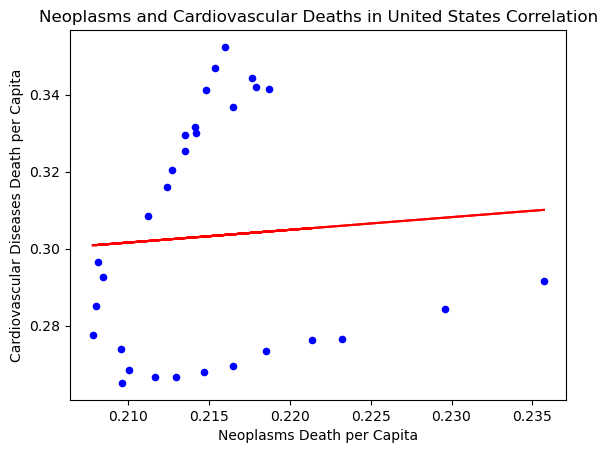

In [34]:
#USA top death correlation 
#usa_death=death_per_capita_df.loc[(death_per_capita_df.index.values=='USA')]
#usa_death.head()

usa_death_top=top_death_of_country('USA')
#usa_death_top

usa_top_5_cor = usa_death_top[['Year', 'Neoplasms Death per Capita', 'Cardiovascular Diseases Death per Capita']]
results_list=st.linregress(usa_top_5_cor['Neoplasms Death per Capita'],usa_top_5_cor['Cardiovascular Diseases Death per Capita'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=usa_top_5_cor['Neoplasms Death per Capita']
y_pred=slope*np.array(x)+intercept
usa_top_5_cor.plot.scatter(['Neoplasms Death per Capita'],['Cardiovascular Diseases Death per Capita'],xlabel='Neoplasms Death per Capita',ylabel='Cardiovascular Diseases Death per Capita' ,title= 'Neoplasms and Cardiovascular Deaths in United States Correlation' ,color='blue')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y_pred, color = 'red')
plt.annotate(line_eq, (.09, .02), fontsize=12,color="red")


model = st.linregress(usa_top_5_cor["Neoplasms Death per Capita"],usa_top_5_cor["Cardiovascular Diseases Death per Capita"])
y_values = usa_top_5_cor["Neoplasms Death per Capita"]*model[0] + model[1]
plt.plot(x, y_values,color='red')

correlation2= st.pearsonr(usa_top_5_cor["Neoplasms Death per Capita"], usa_top_5_cor["Cardiovascular Diseases Death per Capita"])
print(f"The correlation between Neoplasm and Cardio Vascular Deaths in America is {round(correlation2[0],2)}")

#print(x)
#plt.title('Neoplam and Diarrheal Deaths in Afghanistan Correlation')


The correlation between Neoplasm and Cardio Vascular Deaths in America is 0.86


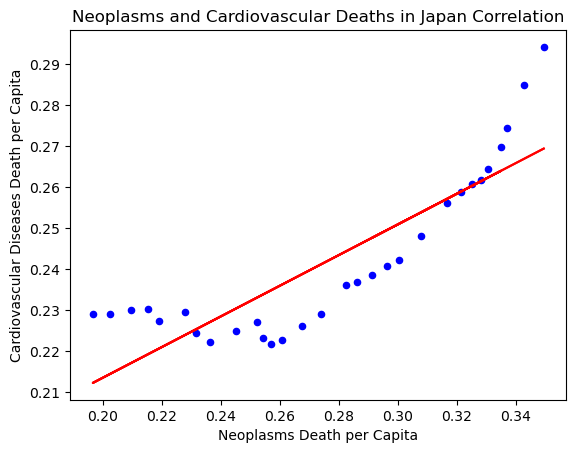

In [35]:
# top death correlation Japan 

jpn_death_top=top_death_of_country('JPN')
#usa_death_top

jpn_death_cor = jpn_death_top[['Year', 'Neoplasms Death per Capita', 'Cardiovascular Diseases Death per Capita']]
results_list=st.linregress(jpn_death_cor['Neoplasms Death per Capita'],jpn_death_cor['Cardiovascular Diseases Death per Capita'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=jpn_death_cor['Neoplasms Death per Capita']
y_pred=slope*np.array(x)+intercept
jpn_death_cor.plot.scatter(['Neoplasms Death per Capita'],['Cardiovascular Diseases Death per Capita'],xlabel='Neoplasms Death per Capita',ylabel='Cardiovascular Diseases Death per Capita' ,title= 'Neoplasms and Cardiovascular Deaths in Japan Correlation' ,color='blue')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y_pred, color = 'red')
plt.annotate(line_eq, (.09, .02), fontsize=12,color="red")


model = st.linregress(jpn_death_cor["Neoplasms Death per Capita"],jpn_death_cor["Cardiovascular Diseases Death per Capita"])
y_values = jpn_death_cor["Neoplasms Death per Capita"]*model[0] + model[1]
plt.plot(x, y_values,color='red')

correlation3= st.pearsonr(jpn_death_cor["Neoplasms Death per Capita"], jpn_death_cor["Cardiovascular Diseases Death per Capita"])
print(f"The correlation between Neoplasm and Cardio Vascular Deaths in America is {round(correlation3[0],2)}")

#print(x)
#plt.title('Neoplam and Diarrheal Deaths in Afghanistan Correlation')


The correlation between Neonatal and Lower Respiratory Infection Deaths in Nigeria is 0.89


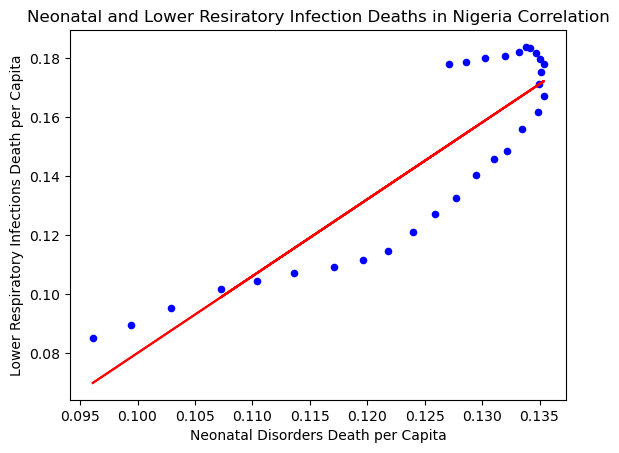

In [36]:
# top death correlation Japan 

nga_death_top=top_death_of_country('NGA')
#usa_death_top

nga_death_cor = nga_death_top[['Year', 'Neonatal Disorders Death per Capita', 'Lower Respiratory Infections Death per Capita']]
results_list=st.linregress(nga_death_cor['Neonatal Disorders Death per Capita'],nga_death_cor['Lower Respiratory Infections Death per Capita'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=nga_death_cor['Neonatal Disorders Death per Capita']
y_pred=slope*np.array(x)+intercept
nga_death_cor.plot.scatter(['Neonatal Disorders Death per Capita'],['Lower Respiratory Infections Death per Capita'],xlabel='Neonatal Disorders Death per Capita',ylabel='Lower Respiratory Infections Death per Capita' ,title= 'Neonatal and Lower Resiratory Infection Deaths in Nigeria Correlation' ,color='blue')
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y_pred, color = 'red')
plt.annotate(line_eq1, (.09, .02), fontsize=12,color="red")


model1 = st.linregress(nga_death_cor["Neonatal Disorders Death per Capita"],nga_death_cor["Lower Respiratory Infections Death per Capita"])
y_values = nga_death_cor["Neonatal Disorders Death per Capita"]*model1[0] + model1[1]
plt.plot(x, y_values,color='red')

correlation4= st.pearsonr(nga_death_cor["Neonatal Disorders Death per Capita"], nga_death_cor["Lower Respiratory Infections Death per Capita"])
print(f"The correlation between Neonatal and Lower Respiratory Infection Deaths in Nigeria is {round(correlation4[0],2)}")

#print(x)
#plt.title('Neoplam and Diarrheal Deaths in Afghanistan Correlation')


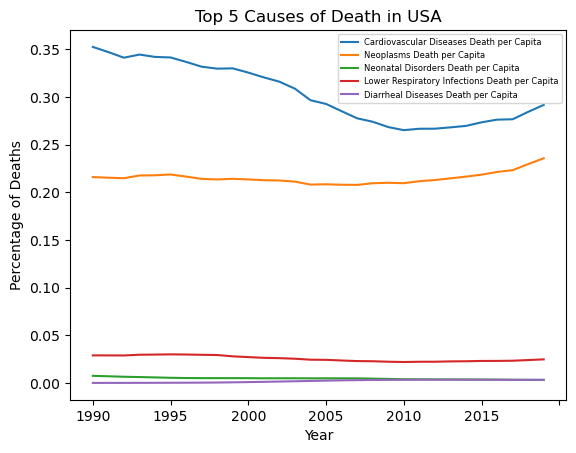

In [37]:
#plot of the top 5 causes of death from 1990-2019 looking at it per capita this time in USA
usa_death_top=top_death_of_country('USA')
usa_death_top=usa_death_top.sort_values('Year')
usa_death_top.plot(x='Year',title='Top 5 Causes of Death in USA').legend(fontsize=6, loc="best")
plt.ylabel('Percentage of Deaths')
plt.show()

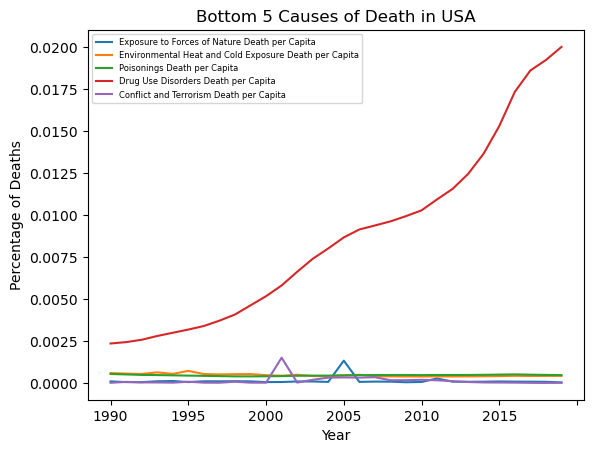

In [38]:
#plot of the bottom 5 causes of death from 1990-2019 looking at it per capita this time in USA
bottom_usa=bottom_death_of_country('USA')
bottom_usa.sort_values('Year',inplace=True)
bottom_usa.plot(x='Year',title='Bottom 5 Causes of Death in USA').legend(fontsize=6, loc="best")
plt.ylabel('Percentage of Deaths')
plt.show()

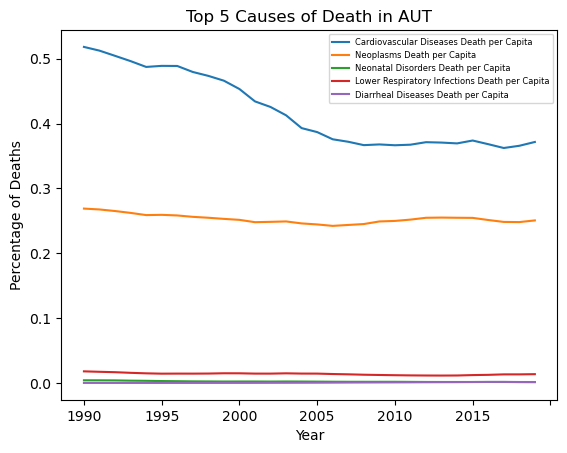

In [39]:
#plot of the top 5 causes of death from 1990-2019 looking at it per capita this time in AUT
top_aut=top_death_of_country('AUT')
top_aut.plot(x='Year',title='Top 5 Causes of Death in AUT').legend(fontsize=6, loc="best")
plt.ylabel('Percentage of Deaths')
plt.show()

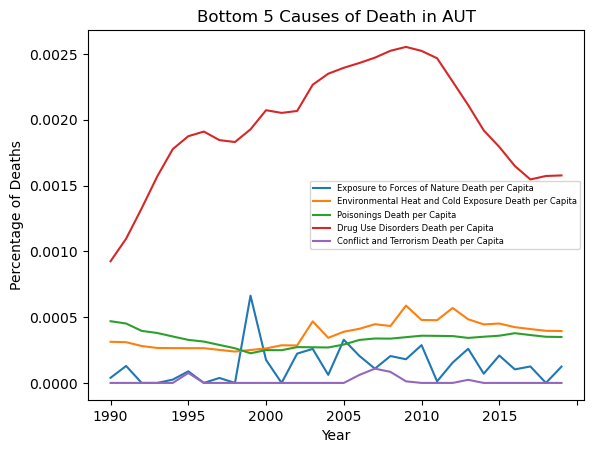

In [40]:
#plot of the bottom 5 causes of death from 1990-2019 looking at it per capita this time in AUT
bottom_aut=bottom_death_of_country('AUT')
bottom_aut.plot(x='Year',title='Bottom 5 Causes of Death in AUT').legend(fontsize=6, loc="best")
plt.ylabel('Percentage of Deaths')
plt.show()

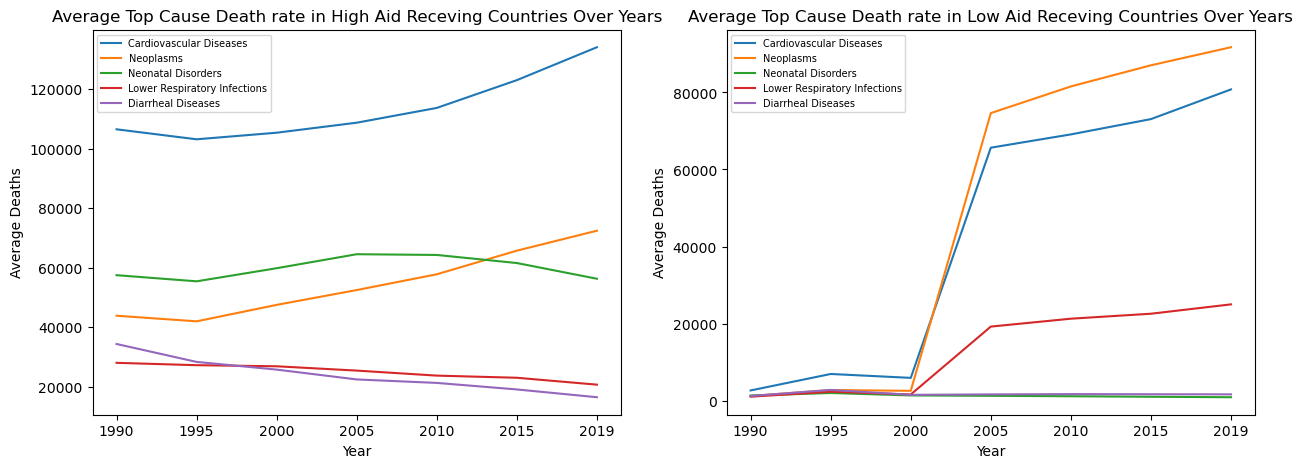

In [41]:
#Is foreign aid receiving affects causes of death
year_df=cause_aid_pop_df.sort_values("Current Amount of Aid Given by US ($USD)",ascending=False)
top_5_countries=['Afghanistan', 'Iraq', 'Israel', 'Poland', 'Pakistan']
top_cause=['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']
country_df=year_df.loc[(year_df["Country/Territory"]=='Afghanistan') | (year_df["Country/Territory"]=='Iraq')|(year_df["Country/Territory"]=='Israel')|(year_df["Country/Territory"]=='Poland')|(year_df["Country/Territory"]=='Pakistan')]
us_df=year_df.loc[(year_df["Country/Territory"]=='United States')]
us_df=us_df[["Country/Territory","Year",'Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]
us_df=us_df.loc[(us_df["Year"]=='1990') | (us_df["Year"]=='1995') |(us_df["Year"]=='2000') | (us_df["Year"]=='2005') | (us_df["Year"]=='2010') | (us_df["Year"]=='2015')|(us_df["Year"]=='2019')]
us_df=us_df.sort_values("Year")
us_df=(us_df.groupby(["Year"])[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]).mean()
filter_top_df=country_df[["Country/Territory","Year",'Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]
filter_top_df=filter_top_df.loc[(filter_top_df["Year"]=='1990') | (filter_top_df["Year"]=='1995') |(filter_top_df["Year"]=='2000') | (filter_top_df["Year"]=='2005') | (filter_top_df["Year"]=='2010') | (filter_top_df["Year"]=='2015')|(filter_top_df["Year"]=='2019')]
# top_aid_df=(filter_top_df.groupby(["Country/Territory","Year"])[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]).mean()
top_aid_df=(filter_top_df.groupby("Year")[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]).mean()

year_df1=cause_aid_pop_df.sort_values("Current Amount of Aid Given by US ($USD)")
bottom_5_countries=['Nicaragua', 'Japan', 'Eritrea', 'Armenia', 'Cyprus']
bcountry_df=year_df.loc[(year_df1["Country/Territory"]=='Nicaragua') | (year_df["Country/Territory"]=='Japan')|(year_df["Country/Territory"]=='Eritrea')|(year_df["Country/Territory"]=='Armenia')|(year_df["Country/Territory"]=='Cyprus')]
filter_bottom_df=bcountry_df[["Country/Territory","Year",'Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]
filter_bottom_df=filter_bottom_df.loc[(filter_bottom_df["Year"]=='1990') | (filter_bottom_df["Year"]=='1995') |(filter_bottom_df["Year"]=='2000') | (filter_bottom_df["Year"]=='2005') | (filter_bottom_df["Year"]=='2010') | (filter_bottom_df["Year"]=='2015')|(filter_bottom_df["Year"]=='2019')]
# bottom_aid_df=(filter_bottom_df.groupby(["Country/Territory","Year"])[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]).mean()
bottom_aid_df=(filter_bottom_df.groupby("Year")[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]).mean()

plt.figure(figsize=(15,4))
ax = plt.subplot(121)
top_aid_df.plot(ax=ax,title="Average Top Cause Death rate in High Aid Receving Countries Over Years",ylabel="Average Deaths",figsize=(15,5)).legend(fontsize=7, loc="upper left")
ax = plt.subplot(122)
bottom_aid_df.plot(ax=ax,title="Average Top Cause Death rate in Low Aid Receving Countries Over Years",ylabel="Average Deaths",figsize=(15,5)).legend(fontsize=7, loc="upper left")
plt.show()

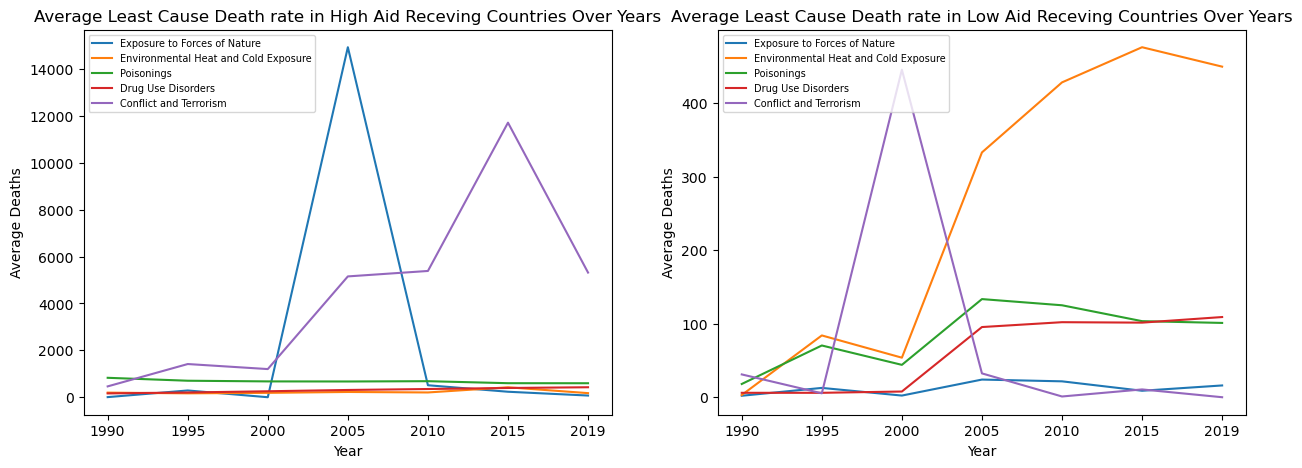

In [42]:
year_df=cause_aid_pop_df.sort_values("Current Amount of Aid Given by US ($USD)",ascending=False)
top_5_countries=['Afghanistan', 'Iraq', 'Israel', 'Poland', 'Pakistan']
bottom_cause=['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']
country_df=year_df.loc[(year_df["Country/Territory"]=='Afghanistan') | (year_df["Country/Territory"]=='Iraq')|(year_df["Country/Territory"]=='Israel')|(year_df["Country/Territory"]=='Poland')|(year_df["Country/Territory"]=='Pakistan')]
us_df=year_df.loc[(year_df["Country/Territory"]=='United States')]
us_df=us_df[["Country/Territory","Year",'Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]
us_df=us_df.loc[(us_df["Year"]=='1990') | (us_df["Year"]=='1995') |(us_df["Year"]=='2000') | (us_df["Year"]=='2005') | (us_df["Year"]=='2010') | (us_df["Year"]=='2015')|(us_df["Year"]=='2019')]
us_df=us_df.sort_values("Year")
us_df=(us_df.groupby(["Year"])[['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]).mean()
filter_top_df=country_df[["Country/Territory","Year",'Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]
filter_top_df=filter_top_df.loc[(filter_top_df["Year"]=='1990') | (filter_top_df["Year"]=='1995') |(filter_top_df["Year"]=='2000') | (filter_top_df["Year"]=='2005') | (filter_top_df["Year"]=='2010') | (filter_top_df["Year"]=='2015')|(filter_top_df["Year"]=='2019')]
top_aid_df=(filter_top_df.groupby("Year")[['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]).mean()

year_df1=cause_aid_pop_df.sort_values("Current Amount of Aid Given by US ($USD)")
bottom_5_countries=['Nicaragua', 'Japan', 'Eritrea', 'Armenia', 'Cyprus']
bcountry_df=year_df.loc[(year_df1["Country/Territory"]=='Nicaragua') | (year_df["Country/Territory"]=='Japan')|(year_df["Country/Territory"]=='Eritrea')|(year_df["Country/Territory"]=='Armenia')|(year_df["Country/Territory"]=='Cyprus')]
filter_bottom_df=bcountry_df[["Country/Territory","Year",'Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]
filter_bottom_df=filter_bottom_df.loc[(filter_bottom_df["Year"]=='1990') | (filter_bottom_df["Year"]=='1995') |(filter_bottom_df["Year"]=='2000') | (filter_bottom_df["Year"]=='2005') | (filter_bottom_df["Year"]=='2010') | (filter_bottom_df["Year"]=='2015')|(filter_bottom_df["Year"]=='2019')]
bottom_aid_df=(filter_bottom_df.groupby("Year")[['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]).mean()

plt.figure(figsize=(15,4))
ax = plt.subplot(121)
top_aid_df.plot(ax=ax,title="Average Least Cause Death rate in High Aid Receving Countries Over Years",ylabel="Average Deaths",figsize=(15,5)).legend(fontsize=7, loc="upper left")
ax = plt.subplot(122)
bottom_aid_df.plot(ax=ax,title="Average Least Cause Death rate in Low Aid Receving Countries Over Years",ylabel="Average Deaths",figsize=(15,5)).legend(fontsize=7, loc="upper left")
plt.show()


In [43]:
#Finding percentage of deaths in high and low income countries
Cause_aid_pct_df=Cause_aid_df.copy()
causes=['Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis']
total_deaths=Cause_aid_pct_df[causes].sum(axis=1)
Cause_aid_pct_df[causes]=Cause_aid_pct_df[causes].apply(lambda x:(x/total_deaths))
income_death_pct_df=Cause_aid_pct_df.groupby('Country Income Category')[causes].mean().T
high_income_deaths=income_death_pct_df.sort_values('High Income Country', ascending=False)
low_income_deaths=income_death_pct_df.sort_values('Low Income Country', ascending=False)

In [44]:
display(income_death_pct_df.sort_values('High Income Country', ascending=False).head())
display(income_death_pct_df.sort_values('Low Income Country', ascending=False).head())

Country Income Category,High Income Country,Low Income Country,Lower Middle Income Country,Upper Middle Income Country
Cardiovascular Diseases,0.385044,0.141208,0.249122,0.366758
Neoplasms,0.248162,0.052960,0.089141,0.155002
Digestive Diseases,0.045092,0.034715,0.050730,0.045333
Chronic Respiratory Diseases,0.043947,0.027277,0.043115,0.041562
Lower Respiratory Infections,0.040784,0.104506,0.081044,0.048855


Country Income Category,High Income Country,Low Income Country,Lower Middle Income Country,Upper Middle Income Country
Cardiovascular Diseases,0.385044,0.141208,0.249122,0.366758
Neonatal Disorders,0.010409,0.106372,0.078531,0.042043
Diarrheal Diseases,0.002935,0.105072,0.061632,0.014881
Lower Respiratory Infections,0.040784,0.104506,0.081044,0.048855
Malaria,0.000040,0.081922,0.030450,0.005393


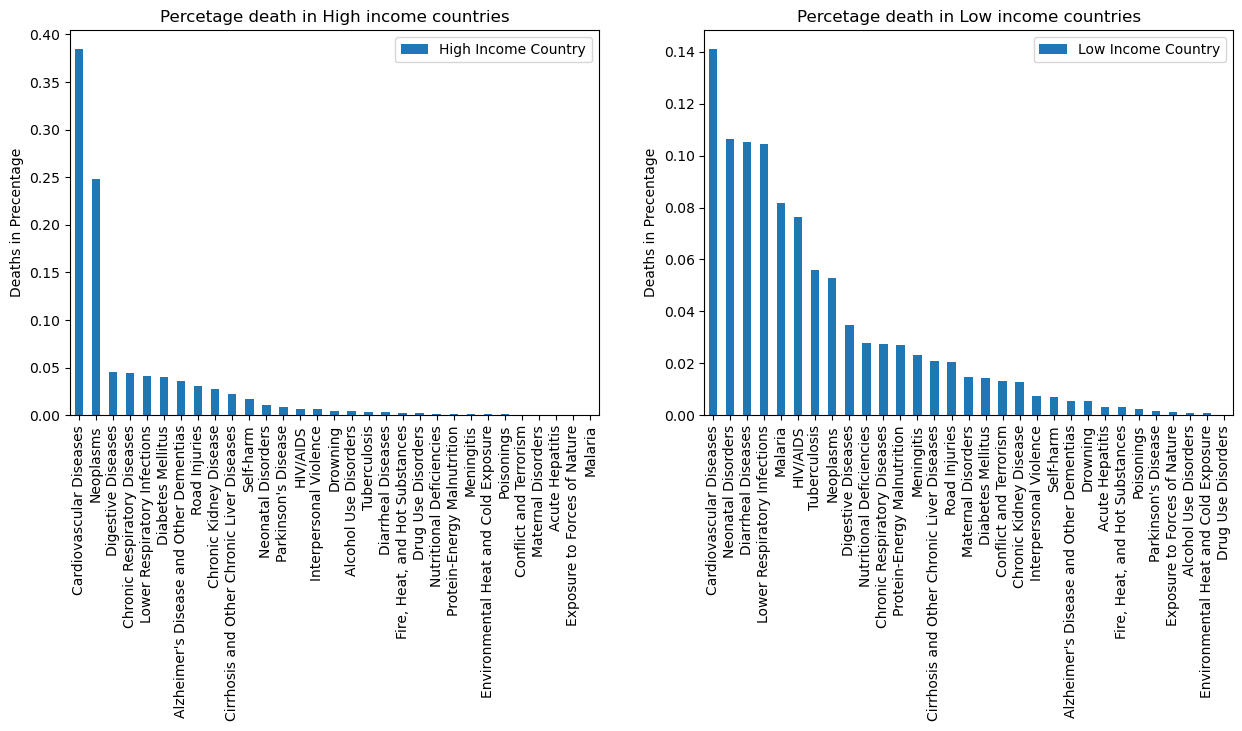

In [45]:
plt.figure(figsize=(15,4))
ax = plt.subplot(121)
high_income_deaths.plot.bar(ax=ax,y="High Income Country",title="Percetage death in High income countries",ylabel="Deaths in Precentage",figsize=(15,5)).legend(fontsize=10, loc="upper right")
ax = plt.subplot(122)
low_income_deaths.plot.bar(ax=ax,y="Low Income Country",title="Percetage death in Low income countries",ylabel="Deaths in Precentage",figsize=(15,5)).legend(fontsize=10, loc="upper right")
plt.show()

In [46]:
#Create new dataframe grouped by country and total the sum
country_totals = (cause_aid_pop_df.groupby(['Country/Territory'])[['Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'Country Income Category','Current Amount of Aid Given by US ($USD)','Constant Amount of Aid Given by US ($USD)']]).sum()
country_totals=country_totals.reset_index()

#country_totals=country_totals.set_index("Country/Territory")
countries_df = pd.read_csv("Resources/countries.csv")

# Iterate through the values in the "Country/Territory" column of country_totals DataFrame
for country_name in country_totals["Country/Territory"]:
    # Check if the country name is in the countries DataFrame
    matching_row = countries_df[countries_df["name"] == country_name]
    # If there is a match, retrieve longitude and latitude
    if not matching_row.empty:
        country_longitude = matching_row["longitude"].values[0]
        country_latitude = matching_row["latitude"].values[0]
        # Update the country_totals DataFrame with longitude and latitude
        country_totals.loc[country_totals["Country/Territory"] == country_name, "Longitude"] = country_longitude
        country_totals.loc[country_totals["Country/Territory"] == country_name, "Latitude"] = country_latitude
                
country_totals.to_csv("Resources/results.csv", index=False)

In [47]:
map_plot_malaria = country_totals.hvplot.points("Longitude", "Latitude", geo = True, tiles = "OSM", frame_width = 800, frame_height = 600, hover_cols=['Malaria', 'Country/Territory'], size = "Malaria", scale = 0.010, color = "Country/Territory", title="Malaria Deaths per Country")

map_plot_malaria

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country/Territory,Malaria)

In [48]:
map_plot_aid = country_totals.hvplot.points("Longitude", "Latitude", geo = True, tiles = "OSM", frame_width = 800, frame_height = 600, hover_cols=['Current Amount of Aid Given by US ($USD)', 'Country/Territory'], size = "Current Amount of Aid Given by US ($USD)", scale = 0.0001, color = "Country/Territory", title="Current Amount of AID ($USD) given by the US per Country")

map_plot_aid

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country/Territory,Current Amount of Aid Given by US ($USD))